<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.705671,79.103365,28.045608,52.602991,208.457634,150.964989,57.492646
1,0.0,1.0,98.777307,62.283616,87.367604,64.774875,323.203403,262.746409,60.456994
2,0.0,2.0,70.313863,42.122461,31.589873,-64.630715,89.395482,151.333068,-61.937586
3,0.0,3.0,37.762910,56.835157,28.020119,-26.648730,105.969457,126.684679,-20.715223
4,0.0,4.0,53.898337,73.218745,79.469728,63.793318,280.380129,215.886363,64.493766
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.668029,81.017222,32.391618,25.598875,223.675743,229.844824,-6.169081
119996,999.0,116.0,58.293063,79.011464,27.293654,39.527550,214.125731,205.510061,8.615670
119997,999.0,117.0,38.280351,77.252186,88.339636,6.393388,220.265562,220.926416,-0.660854
119998,999.0,118.0,42.162935,74.529725,24.622763,8.315792,159.631215,179.386417,-19.755202


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.705671,79.103365,28.045608,52.602991,208.457634,150.964989,57.492646
1,0.0,1.0,98.777307,62.283616,87.367604,64.774875,323.203403,262.746409,60.456994
2,0.0,2.0,70.313863,42.122461,31.589873,-64.630715,89.395482,151.333068,-61.937586
3,0.0,3.0,37.762910,56.835157,28.020119,-26.648730,105.969457,126.684679,-20.715223
4,0.0,4.0,53.898337,73.218745,79.469728,63.793318,280.380129,215.886363,64.493766
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.668029,81.017222,32.391618,25.598875,223.675743,229.844824,-6.169081
119996,999.0,116.0,58.293063,79.011464,27.293654,39.527550,214.125731,205.510061,8.615670
119997,999.0,117.0,38.280351,77.252186,88.339636,6.393388,220.265562,220.926416,-0.660854
119998,999.0,118.0,42.162935,74.529725,24.622763,8.315792,159.631215,179.386417,-19.755202


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    38.705671  79.103365  28.045608  52.602991  208.457634   
      1.0    98.777307  62.283616  87.367604  64.774875  323.203403   
      2.0    70.313863  42.122461  31.589873 -64.630715   89.395482   
      3.0    37.762910  56.835157  28.020119 -26.648730  105.969457   
      4.0    53.898337  73.218745  79.469728  63.793318  280.380129   
...                ...        ...        ...        ...         ...   
999.0 115.0  74.668029  81.017222  32.391618  25.598875  223.675743   
      116.0  58.293063  79.011464  27.293654  39.527550  214.125731   
      117.0  38.280351  77.252186  88.339636   6.393388  220.265562   
      118.0  42.162935  74.529725  24.622763   8.315792  159.631215   
      119.0  22.922278  41.636598  99.728394  48.581857  222.869127   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    150.964989  57.492646  
      1.0    262.746409  60.456994  
      2.0    151.333068 -61.937586  
      3.0    126.684679 -20.715223  
      4.0    215.886363  64.493766  
...                 ...        ...  
999.0 115.0  229.844824  -6.169081  
      116.0  205.510061   8.615670  
      117.0  220.926416  -0.660854  
      118.0  179.386417 -19.755202  
      119.0  158.970561  63.898566  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    38.705671  79.103365  28.045608  52.602991  208.457634   
      1.0    98.777307  62.283616  87.367604  64.774875  323.203403   
      2.0    70.313863  42.122461  31.589873 -64.630715   89.395482   
      3.0    37.762910  56.835157  28.020119 -26.648730  105.969457   
      4.0    53.898337  73.218745  79.469728  63.793318  280.380129   
...                ...        ...        ...        ...         ...   
999.0 115.0  74.668029  81.017222  32.391618  25.598875  223.675743   
      116.0  58.293063  79.011464  27.293654  39.527550  214.125731   
      117.0  38.280351  77.252186  88.339636   6.393388  220.265562   
      118.0  42.162935  74.529725  24.622763   8.315792  159.631215   
      119.0  22.922278  41.636598  99.728394  48.581857  222.869127   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    150.964989  57.492646  
      1.0    262.746409  60.456994  
      2.0    151.333068 -61.937586  
      3.0    126.684679 -20.715223  
      4.0    215.886363  64.493766  
...                 ...        ...  
999.0 115.0  229.844824  -6.169081  
      116.0  205.510061   8.615670  
      117.0  220.926416  -0.660854  
      118.0  179.386417 -19.755202  
      119.0  158.970561  63.898566  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.705671,79.103365,28.045608,52.602991,208.457634,150.964989,57.492646
1,0.0,1.0,98.777307,62.283616,87.367604,64.774875,323.203403,262.746409,60.456994
2,0.0,2.0,70.313863,42.122461,31.589873,-64.630715,89.395482,151.333068,-61.937586
3,0.0,3.0,37.762910,56.835157,28.020119,-26.648730,105.969457,126.684679,-20.715223
4,0.0,4.0,53.898337,73.218745,79.469728,63.793318,280.380129,215.886363,64.493766
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.668029,81.017222,32.391618,25.598875,223.675743,229.844824,-6.169081
119996,999.0,116.0,58.293063,79.011464,27.293654,39.527550,214.125731,205.510061,8.615670
119997,999.0,117.0,38.280351,77.252186,88.339636,6.393388,220.265562,220.926416,-0.660854
119998,999.0,118.0,42.162935,74.529725,24.622763,8.315792,159.631215,179.386417,-19.755202


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    38.705671  79.103365  28.045608  52.602991  208.457634   
      1.0    98.777307  62.283616  87.367604  64.774875  323.203403   
      2.0    70.313863  42.122461  31.589873 -64.630715   89.395482   
      3.0    37.762910  56.835157  28.020119 -26.648730  105.969457   
      4.0    53.898337  73.218745  79.469728  63.793318  280.380129   
...                ...        ...        ...        ...         ...   
999.0 115.0  74.668029  81.017222  32.391618  25.598875  223.675743   
      116.0  58.293063  79.011464  27.293654  39.527550  214.125731   
      117.0  38.280351  77.252186  88.339636   6.393388  220.265562   
      118.0  42.162935  74.529725  24.622763   8.315792  159.631215   
      119.0  22.922278  41.636598  99.728394  48.581857  222.869127   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    150.964989  57.492646  
      1.0    262.746409  60.456994  
      2.0    151.333068 -61.937586  
      3.0    126.684679 -20.715223  
      4.0    215.886363  64.493766  
...                 ...        ...  
999.0 115.0  229.844824  -6.169081  
      116.0  205.510061   8.615670  
      117.0  220.926416  -0.660854  
      118.0  179.386417 -19.755202  
      119.0  158.970561  63.898566  

[120000 rows x 7 columns]

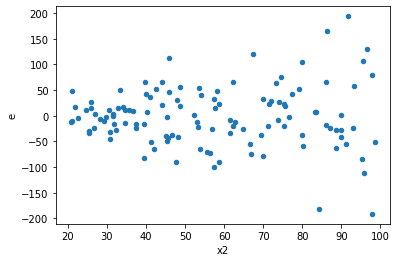

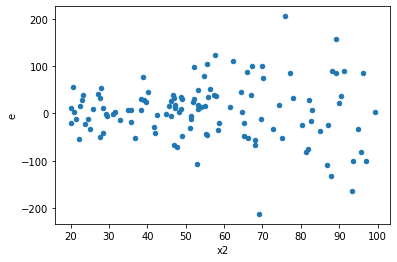

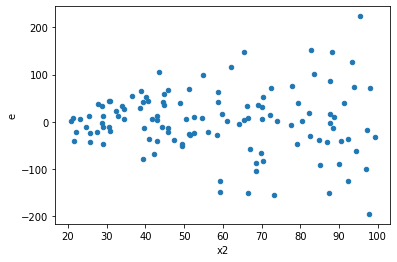

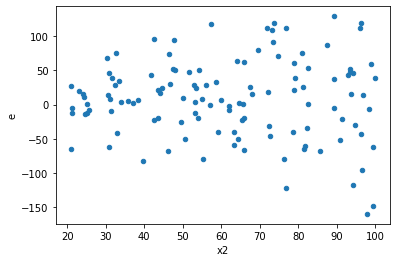

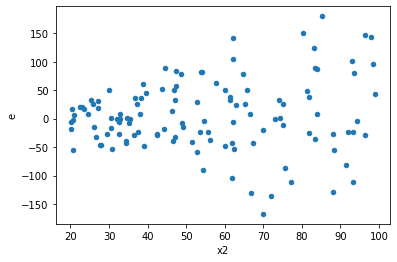

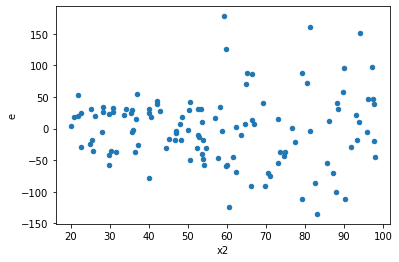

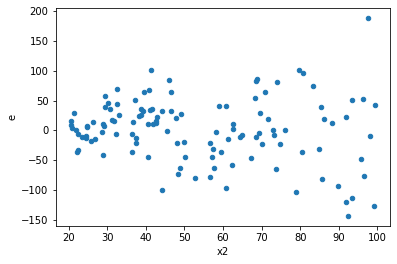

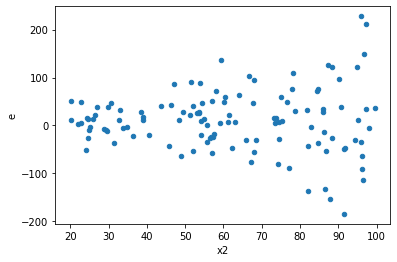

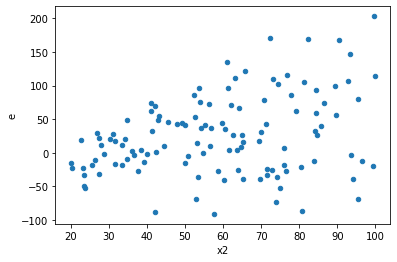

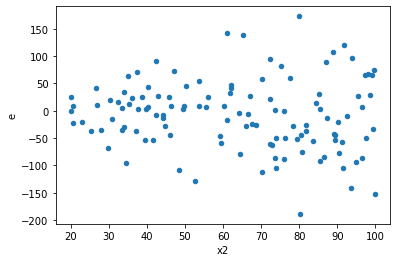

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,83555.04783428049,245363.32195658179,1856.7788407617886,5452.518265701818,2.9365469629462115,0.000444783788536407,0.9997776081057318,0.0002223918942682035,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,120525.50085379631,216196.17677678412,2678.344463417696,4804.359483928536,1.7937795341671412,0.05292891010190326,0.9735355449490484,0.02646445505095163,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,84695.63191754329,284156.210653789,1882.1251537231842,6314.582458973089,3.355027930253045,8.704187777364147e-05,0.9999564790611132,4.352093888682074e-05,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,66106.39394301726,211588.39263992893,1469.0309765114946,4701.9642808873095,3.200725073921216,0.00015730584339879172,0.9999213470783006,7.865292169939586e-05,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,58844.21727366915,299843.8573839273,1307.6492727482034,6663.196830753939,5.095553501704874,2.3311925856361881e-07,0.9999998834403707,1.1655962928180941e-07,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,66845.61301628206,149284.67284363083,1485.4580670284902,3317.4371743029074,2.2332755450573623,0.008159606426354493,0.9959201967868228,0.004079803213177247,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,93281.91297377131,183571.14482831262,2072.9313994171403,4079.3587739625027,1.967917884359088,0.02527556603202563,0.9873622169839872,0.012637783016012816,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,67352.07543262871,304352.7985431396,1496.712787391749,6763.3955231808795,4.518833259230136,1.4357352384752886e-06,0.9999992821323808,7.178676192376443e-07,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,89773.49896346315,212529.11522770964,1994.9666436325144,4722.869227282436,2.3673925788968826,0.004625111513903102,0.9976874442430484,0.002312555756951551,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,83555.04783428049,245363.32195658179,1856.7788407617886,5452.518265701818,2.9365469629462115,0.000444783788536407,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,120525.50085379631,216196.17677678412,2678.344463417696,4804.359483928536,1.7937795341671412,0.05292891010190326,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,84695.63191754329,284156.210653789,1882.1251537231842,6314.582458973089,3.355027930253045,8.704187777364147e-05,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,66106.39394301726,211588.39263992893,1469.0309765114946,4701.9642808873095,3.200725073921216,0.00015730584339879172,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,58844.21727366915,299843.8573839273,1307.6492727482034,6663.196830753939,5.095553501704874,2.3311925856361881e-07,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,66845.61301628206,149284.67284363083,1485.4580670284902,3317.4371743029074,2.2332755450573623,0.008159606426354493,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,93281.91297377131,183571.14482831262,2072.9313994171403,4079.3587739625027,1.967917884359088,0.02527556603202563,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,67352.07543262871,304352.7985431396,1496.712787391749,6763.3955231808795,4.518833259230136,1.4357352384752886e-06,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,89773.49896346315,212529.11522770964,1994.9666436325144,4722.869227282436,2.3673925788968826,0.004625111513903102,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    665
Reject005=1 : Homoscedasticity      335
Name: Result_test, dtype: int64